<a href="https://colab.research.google.com/github/K-J-HYEON/good/blob/add-input-method/19_RNN2_imdb_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 100)         500000    
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 100)         0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 64)          32064     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, None, 64)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 55)                26400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 56        
_________________________________________________________________
activation_1 (Activation)    (None, 1)                

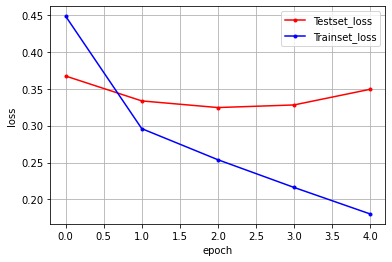

CPU times: user 31.3 s, sys: 2.42 s, total: 33.7 s
Wall time: 28.4 s


In [ ]:
# -*- coding: utf-8 -*-
# 코드 내부에 한글을 사용가능 하게 해주는 부분입니다.

%%time
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation #
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Conv1D, MaxPooling1D #CNN모델을 같이 혼합해서 써보겠다. #Conv1D 중요
from keras.datasets import imdb

import numpy
import tensorflow as tf
import matplotlib.pyplot as plt

# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

# 학습셋, 테스트셋 지정하기
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=5000) #num_words라는 인자는 =5000이니까 1~5000에 해당하는 단어만 선택해서 불러오는 것이다.

# 데이터 전처리
x_train = sequence.pad_sequences(x_train, maxlen=100)
#이때는 다음과 같이 데이터 전처리 함수 sequence()를 이용한다.
#100개 이상이면 버리고 100개 미만이면 값을 취하겠다.(100에서 모자랄 때는 모자라는 부분을 모두 0으로 채운다.) #maxlen = 100

x_test = sequence.pad_sequences(x_test, maxlen=100)

# 모델의 설정
model = Sequential()
model.add(Embedding(5000, 100)) #(불러온 단어의 총 개수, 영화 당 단어 수)
#5000개의 단어를 ~(100개의 노드를 통과?해서=>param 50만 차원)

model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation='relu',strides=1))
#64종류의 mask, 5 * 5의 kunnel크기/ padding은 valid니까 zeropadding과 반대 =>  #렐루로 빼고 1칸씩 옮긴다.

model.add(MaxPooling1D(pool_size=4)) #필터된 값을 가지고 맥스풀링으로 줄인다.(가장 큰 값을 다음 층으로 넘기고 나머지는 버린다.)

model.add(LSTM(55))
model.add(Dense(1)) #덴스로 쌓은 다음에
model.add(Activation('sigmoid'))
model.summary()#model.summary()함수 = > 현재 설정된 모델의 구조를 한눈에 볼 수 있다.

# 모델의 컴파일
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델의 실행
history = model.fit(x_train, y_train, batch_size=100, epochs=5, validation_data=(x_test, y_test))


# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))


# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
